<a href="https://colab.research.google.com/github/Rotichkiprono/NeuralNetworks/blob/main/ConvolutionaAndReLU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # NumPy is often used to represent and work with image data as arrays
import tensorflow as tf #provides the tools to build and train computer vision models
import matplotlib.pyplot as plt #creating visualizations like plots and images

plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

tf.config.run_functions_eagerly(True) #utomatically adjusts layout elements for better readability.

# **loading an image we'll use**

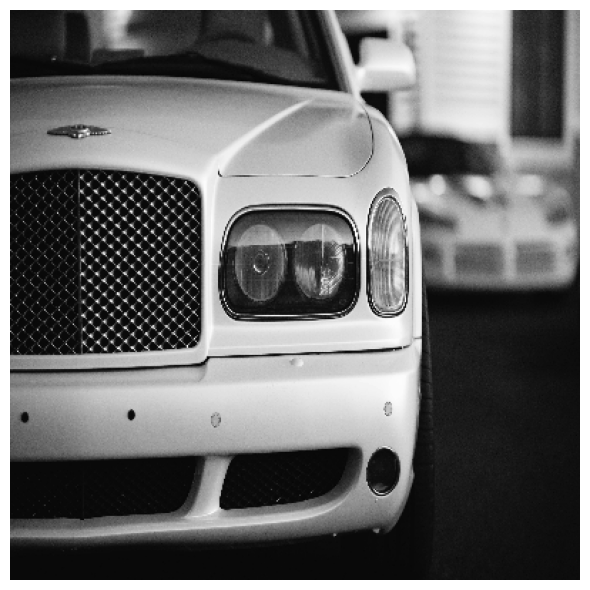

In [2]:
image_path = '/content/car_illus.jpg'
image = tf.io.read_file(image_path) #read the image data and returns the raw bytes of the image file.
image = tf.io.decode_jpeg(image, channels=1) #decode the raw bytes into a tensor representing the image.
image = tf.image.resize(image, size=[400, 400]) #resize the image tensor to a specific size.

img = tf.squeeze(image).numpy() #remove any unnecessary dimensions from the tensor and converts the tensor representation of the image into a NumPy array for image processing
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show();

# **standard kernels used in image processing**
a small square matrix used in image processing techniques like convolution

In [4]:
kernel = tf.constant([ # tensor is a multi-dimensional array that holds data
    [1,1,1],
    [0,1,1],
    [0,0,0],
])

# **reformatting**

In [5]:
# Reformat for batch compatibility.
image = tf.image.convert_image_dtype(image, dtype=tf.float32) #common data type used for calculations in machine learning
image = tf.expand_dims(image, axis=0) # creates a batch dimension even if the code is working with a single image
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1]) #ensure it has the expected format for applying filters to an image
kernel = tf.cast(kernel, dtype=tf.float32) #ensures consistency with the image data type for calculations.

# **applying convolution filter to a preprocessed image**
convolution operation essentially extracts features from the image based on the patterns defined in the kernel.

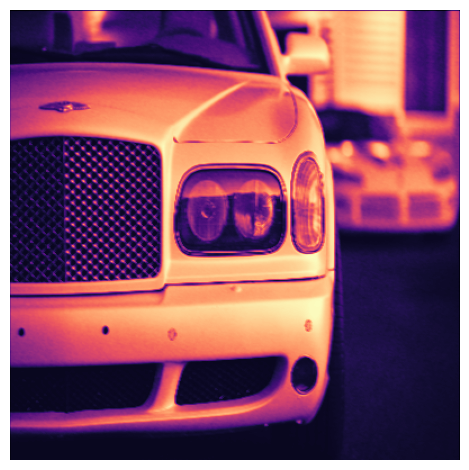

In [9]:
conv_fn= tf.nn.conv2d #function performs a 2D convolution operation on an input tensor.
image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1, # controls how much the filter moves across the image while performing the convolution
    padding='SAME', #ensures the output image has the same dimensions as the input image
)
plt.imshow(
        tf.squeeze(image_filter)
)
plt.axis('off')
plt.show();

# Apply **ReLU**

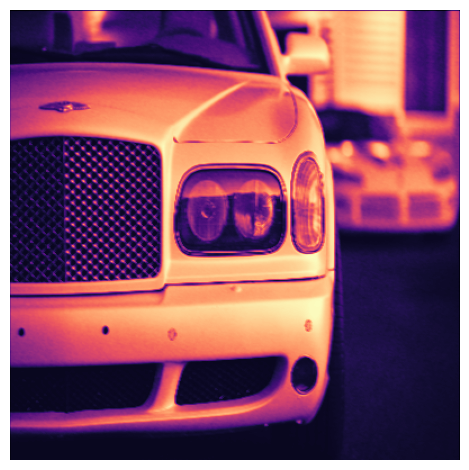

In [11]:
relu_fn = tf.nn.relu
image_detect = relu_fn(image_filter) # element is greater than zero, it remains unchanged. & less than or equal to zero, it's set to zero.

plt.imshow(
    tf.squeeze(image_detect)
)
plt.axis('off')
plt.show();

# **MATHEMATICAL POINT OF VIEW**

In [12]:
# Sympy is a python library for symbolic mathematics. It has a nice
# pretty printer for matrices, which is all we'll use it for.
import sympy
sympy.init_printing()
from IPython.display import display

image = np.array([
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 1, 1],
    [0, 1, 0, 0, 0, 0],
])

kernel = np.array([
    [1, -1],
    [1, -1],
])

display(sympy.Matrix(image))
display(sympy.Matrix(kernel))
# Reformat for Tensorflow
image = tf.cast(image, dtype=tf.float32)
image = tf.reshape(image, [1, *image.shape, 1])
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

⎡0  1  0  0  0  0⎤
⎢                ⎥
⎢0  1  0  0  0  0⎥
⎢                ⎥
⎢0  1  0  0  0  0⎥
⎢                ⎥
⎢0  1  0  0  0  0⎥
⎢                ⎥
⎢0  1  0  1  1  1⎥
⎢                ⎥
⎣0  1  0  0  0  0⎦

⎡1  -1⎤
⎢     ⎥
⎣1  -1⎦

In [13]:
image_filter = tf.nn.conv2d(
    input=image,
    filters=kernel,
    strides=1,
    padding='VALID', #ensures the output image might have shrunk compared to the input
)
image_detect = tf.nn.relu(image_filter)

display(sympy.Matrix(tf.squeeze(image_filter).numpy()))
display(sympy.Matrix(tf.squeeze(image_detect).numpy()))

⎡-2.0  2.0   0    0  0⎤
⎢                     ⎥
⎢-2.0  2.0   0    0  0⎥
⎢                     ⎥
⎢-2.0  2.0   0    0  0⎥
⎢                     ⎥
⎢-2.0  2.0  -1.0  0  0⎥
⎢                     ⎥
⎣-2.0  2.0  -1.0  0  0⎦

⎡0  2.0  0  0  0⎤
⎢               ⎥
⎢0  2.0  0  0  0⎥
⎢               ⎥
⎢0  2.0  0  0  0⎥
⎢               ⎥
⎢0  2.0  0  0  0⎥
⎢               ⎥
⎣0  2.0  0  0  0⎦